In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed/data1h.csv', index_col=0, parse_dates=True)
df

,MpKrakZloRog,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindSpeed,AirPressure,year,day_off,month_sin,month_cos,hour_sin,hour_cos,sin_WindDir,cos_WindDir
2016-01-01 01:00:00,342.9240,-9.153333,0.000000,0.00,1.1,71.593333,0.703333,1000.516667,2016,1,5.000000e-01,0.866025,0.258819,0.965926,-0.996195,-0.087156
2016-01-01 02:00:00,329.6600,-9.475000,0.000000,0.00,1.4,71.685000,0.698333,1000.363333,2016,1,5.000000e-01,0.866025,0.500000,0.866025,-0.999848,-0.017452
2016-01-01 03:00:00,322.5390,-9.851667,0.000000,0.00,1.6,71.863333,0.743333,1000.123333,2016,1,5.000000e-01,0.866025,0.707107,0.707107,-0.974370,0.224951
2016-01-01 04:00:00,294.5480,-10.175000,0.000000,0.00,1.4,71.668333,0.661667,1000.190000,2016,1,5.000000e-01,0.866025,0.866025,0.500000,-0.961262,0.275637
2016-01-01 05:00:00,285.5270,-10.160000,0.000000,0.00,1.5,71.786667,0.600000,999.881667,2016,1,5.000000e-01,0.866025,0.965926,0.258819,-0.939693,-0.342020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,29.7133,4.635000,0.000000,0.00,1.6,74.210000,0.866667,980.588333,2023,1,-2.449294e-16,1.000000,-0.965926,0.258819,0.974370,0.224951
2023-12-31 20:00:00,32.3285,4.368333,0.000000,0.00,1.4,74.971667,0.721667,980.480000,2023,1,-2.449294e-16,1.000000,-0.866025,0.500000,0.358368,0.933580
2023-12-31 21:00:00,38.2589,3.943333,0.000000,0.00,1.2,76.206667,0.546667,980.611667,2023,1,-2.449294e-16,1.000000,-0.707107,0.707107,-0.358368,0.933580
2023-12-31 22:00:00,41.0132,3.903333,0.000000,0.00,1.5,76.143333,0.585000,980.510000,2023,1,-2.449294e-16,1.000000,-0.500000,0.866025,-0.515038,0.857167


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [4]:
# only for pollution
def df_to_X_y_singular(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)       

In [5]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame({'Predictions': predictions, 'Actual Value': y})
    plt.plot(df['Actual Value'][start:end], label='Actual Value')
    plt.plot(df['Predictions'][start:end], label='Predictions')
    plt.legend()
    plt.show()
    return df, mean_squared_error(y, predictions), r2_score(y, predictions)

In [6]:
X, y = df_to_X_y_singular(df.MpKrakZloRog, window_size=12)

In [7]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [10]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
cp = ModelCheckpoint('models/RNN/singular_1h.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [12]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 361.2764 - root_mean_squared_error: 17.6449 - val_loss: 41.9778 - val_root_mean_squared_error: 6.4790
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 95.3486 - root_mean_squared_error: 9.7628 - val_loss: 41.7234 - val_root_mean_squared_error: 6.4594
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 92.9828 - root_mean_squared_error: 9.6418 - val_loss: 39.2635 - val_root_mean_squared_error: 6.2661
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 91.1093 - root_mean_squared_error: 9.5429 - val_loss: 39.1355 - val_root_mean_squared_error: 6.2558
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 93.3158 - root_mean_squared_error: 9.6584 - val_loss: 39.0570 - val_root_mean_squared_error: 6.2496
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 91.6166 - root_mean_squared_error: 9.5710 - val_loss: 39.5709 - val_root_mean_squared_error: 6.2905
Epoch 7/15
1875/1875 ━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


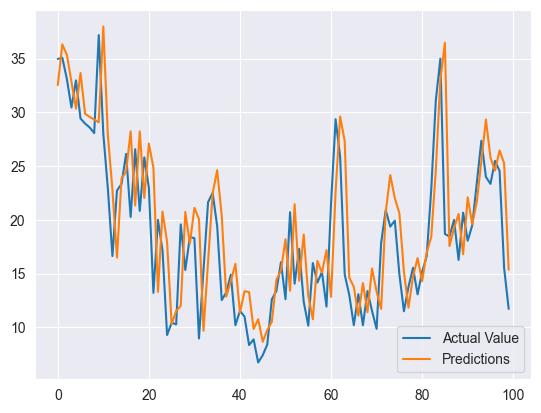

(      Predictions  Actual Value
 0       32.519382       34.9620
 1       36.313541       35.0748
 2       35.343422       33.0905
 3       32.849957       30.4439
 4       30.342060       32.9597
 ...           ...           ...
 5110    23.517536       29.7133
 5111    32.907486       32.3285
 5112    34.599895       38.2589
 5113    40.030487       41.0132
 5114    42.094269       47.8850
 
 [5115 rows x 2 columns],
 np.float64(37.594819596699246),
 0.8532356680030544)

In [13]:
plot_predictions(model, X_test, y_test)

# Weather and date

In [14]:
def df_to_X_y_dw(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size, 1:]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)    

In [15]:
train_size = 60000
val_size = 5000

df_train = df.iloc[:train_size].copy()
df_val = df.iloc[train_size:train_size+val_size].copy()
df_test = df.iloc[train_size+val_size:].copy()

In [16]:
columns_to_scale = ['AirTemp', 'rainIntensity', 'rainAccumulation',
       'maxWindSpeed', 'RelativeHumidity', 'WindSpeed', 'AirPressure', 'year']

scaler = StandardScaler()
scaler_y = StandardScaler()

scaler.fit(df_train[columns_to_scale])
scaler_y.fit(df_train.loc[:, 'MpKrakZloRog'].to_frame())

df_train[columns_to_scale] = scaler.transform(df_train[columns_to_scale])
df_train['MpKrakZloRog'] = scaler_y.transform(df_train['MpKrakZloRog'].to_frame())
df_val[columns_to_scale] = scaler.transform(df_val[columns_to_scale])
df_val['MpKrakZloRog'] = scaler_y.transform(df_val['MpKrakZloRog'].to_frame())
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])
df_test['MpKrakZloRog'] = scaler_y.transform(df_test['MpKrakZloRog'].to_frame())

In [17]:
window_size = 12
X_train, y_train = df_to_X_y_dw(df_train, window_size)
X_val, y_val = df_to_X_y_dw(df_val, window_size)
X_test, y_test = df_to_X_y_dw(df_test, window_size)

In [18]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,351 (13.09 KB)

 Trainable params: 3,351 (13.09 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
cp = ModelCheckpoint('models/RNN/date_weather.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [20]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7606 - root_mean_squared_error: 0.8645 - val_loss: 0.2355 - val_root_mean_squared_error: 0.4853
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3818 - root_mean_squared_error: 0.6178 - val_loss: 0.2191 - val_root_mean_squared_error: 0.4680
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3395 - root_mean_squared_error: 0.5826 - val_loss: 0.2355 - val_root_mean_squared_error: 0.4853
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3208 - root_mean_squared_error: 0.5664 - val_loss: 0.2269 - val_root_mean_squared_error: 0.4763
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2904 - root_mean_squared_error: 0.5389 - val_loss: 0.2262 - val_root_mean_squared_error: 0.4756
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2894 - root_mean_squared_error: 0.5380 - val_loss: 0.2377 - val_root_mean_squared_error: 0.4875
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


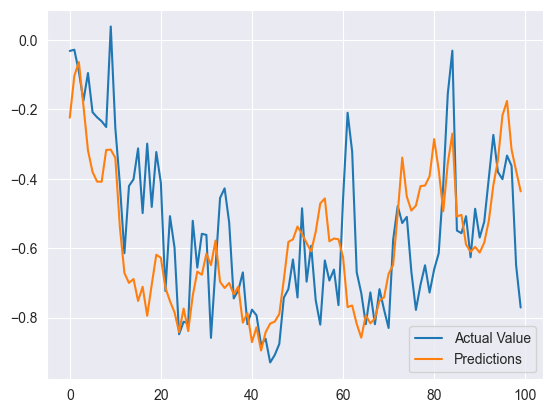

(      Predictions  Actual Value
 0       -0.224673     -0.032409
 1       -0.104305     -0.028827
 2       -0.064344     -0.091827
 3       -0.189901     -0.175853
 4       -0.318951     -0.095979
 ...           ...           ...
 5110     0.128640     -0.199049
 5111     0.187840     -0.116019
 5112     0.179474      0.072264
 5113     0.138508      0.159711
 5114     0.061598      0.377883
 
 [5115 rows x 2 columns],
 np.float64(0.1275545810912301),
 0.5059957480896764)

In [21]:
plot_predictions(model, X_test, y_test)